# Image segmentation with Watershed algorithm

## To feed the image to Watershed algorithm we first have to process it which includes the following procedure
* Blurring the image in order to remove noise from the image
* Converting the image to Grayscale for later applyig threshold on it
* Applying Binary threshold with OTSU threshold to Grayscale image
* Applying the Distance Transform operator on the binary image in order to extract Seeds/Markers from the image
* Distance Tranformed image(sure foreground) is then subtracted with the dilated binary image(sure background) to create the unknown region which is then applied with the black color, This is neccessary for the Watershed algorithm
* The image is then fed to the Watershed algorithm and External Contour is applied to segment the image

In [31]:
#importing all the dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#Function to display images in a large scale
def display(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

### Step 1: Reading and displaying the image

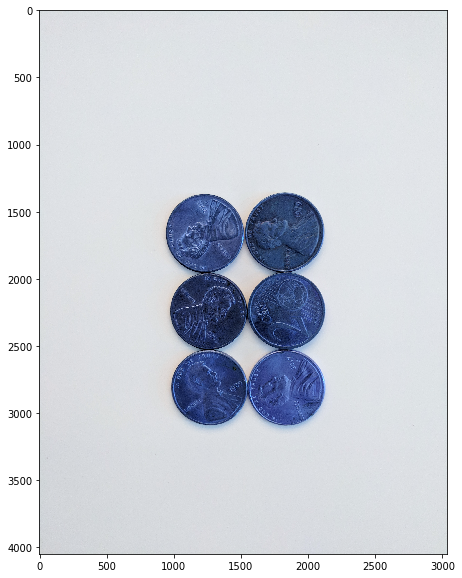

In [33]:
#Reading and Displaying the target image
img = cv2.imread('pennies.jpg')
display(img)     #BGR 

### Step 2 : Applying Blur

In [34]:
#Blurring the image with 35x35 kernel because the image is of high resolution
med_blur = cv2.medianBlur(img,35)

### Step 3: Converting to Grayscale

In [35]:
#Converting image to Graysale
gray_img = cv2.cvtColor(med_blur,cv2.COLOR_BGR2GRAY)

### Step 4: Applying threshold(Inverse Binary with OTSU )

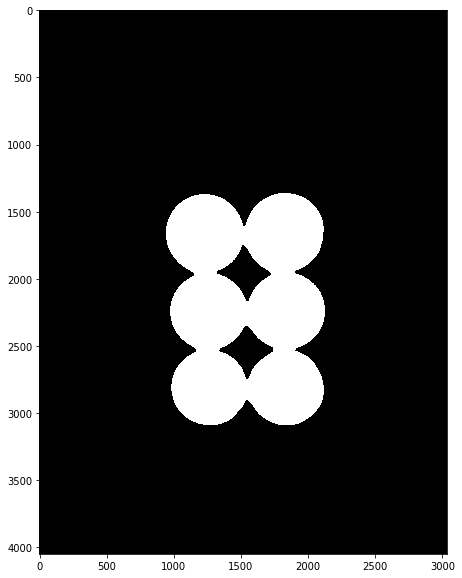

In [36]:
#Applying Binary threshold to the Grayscale image
ret , thsd_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thsd_img,cmap='gray')

### Step 5: Grab sure background

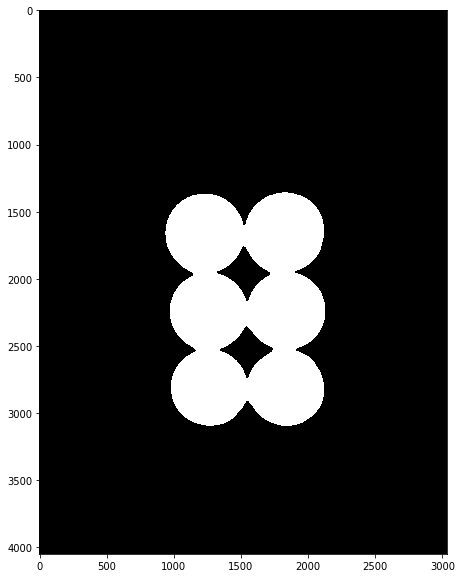

In [37]:
#Dilating the image to grab sure background
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(thsd_img,kernel,iterations=3)
display(sure_bg,cmap='gray')

### Step 6: Finding sure foreground

In [38]:
#Applying distance transform to get sure foreground
dist_trfm = cv2.distanceTransform(thsd_img,cv2.DIST_L2,5)
ret ,sure_fg = cv2.threshold(dist_trfm,0.7*dist_trfm.max(),255,0)

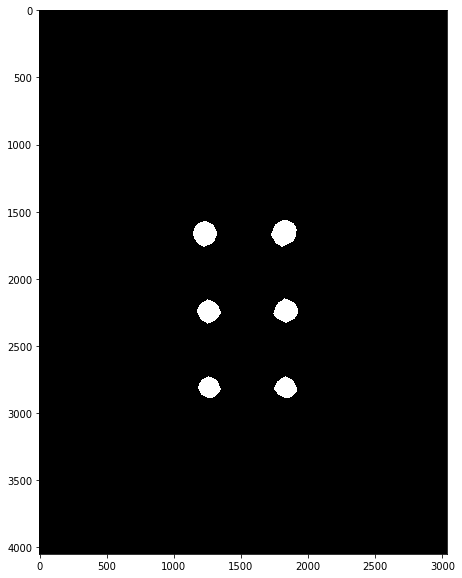

In [39]:
display(sure_fg,cmap='gray')

### Step 7: finding unknown region

In [40]:
#finding unknown region
sure_fg = np.uint8(sure_fg)
unknown_reg = cv2.subtract(sure_bg,sure_fg)


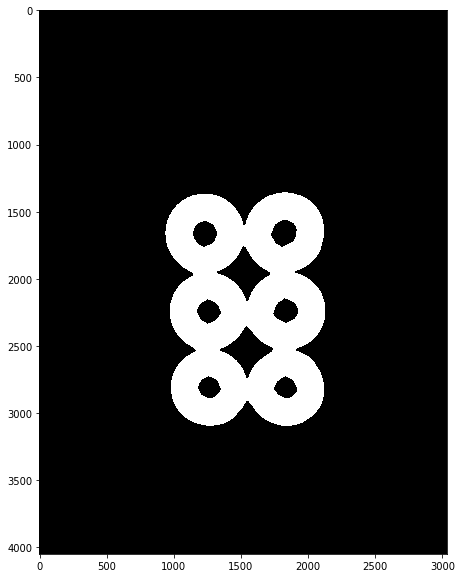

In [41]:
display(unknown_reg,cmap='gray')

### Step 8: Label Marking for sure foreground

In [42]:
#Marker labelling
ret , markers = cv2.connectedComponents(sure_fg)

#Assigning all markers with value 1 so that unknown region is not 0, but 1
markers = markers + 1

markers[unknown_reg==255] = 0


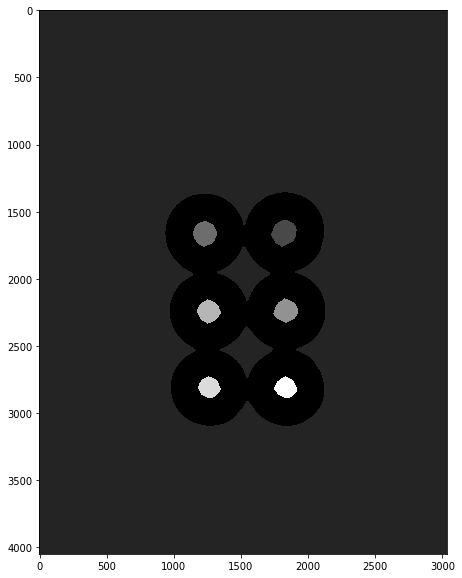

In [43]:
display(markers,cmap='gray')

### Step 9: Apply Watershed algorithm to find markers

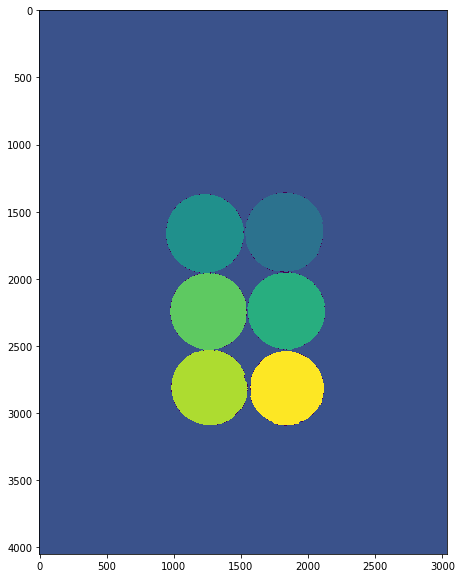

In [44]:
#Applying Watershed algorithm to find markers
markers = cv2.watershed(img,markers)
display(markers)

### Step 10: Finding External contours on markers to segment the image

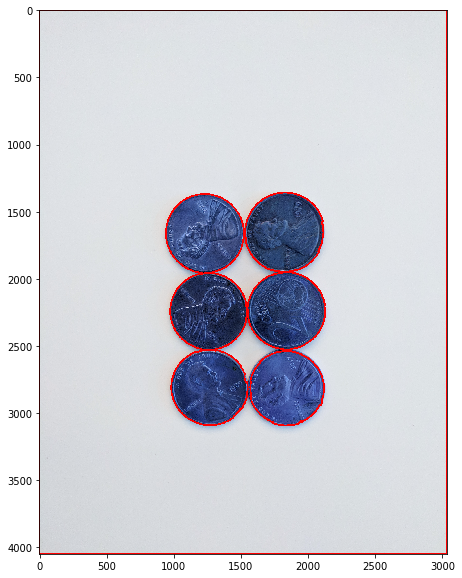

In [45]:
#Applying External contours
_, contours, _ = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,contours,contourIdx=-1,color=255,thickness=10)
display(img)